In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      10239 non-null  object
 1   statement  10239 non-null  object
dtypes: object(2)
memory usage: 160.1+ KB


In [ ]:
import pandas as pd
 
train_set = pd.read_table('train.tsv')
train_set.columns = ['id','label','statement','subjects','speaker','speakers job title','state info','party aff','barely true counts','false counts','half true counts','mostly true counts','pants on fire counts','venue']
train_set.head()

,id,label,statement,subjects,speaker,speakers job title,state info,party aff,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [ ]:
train_set = train_set.drop(['id','subjects','speaker','speakers job title','state info','party aff','barely true counts','false counts','half true counts','mostly true counts','pants on fire counts','venue'], axis=1)
train_set.head()

,label,statement
0,half-true,When did the decline of coal start? It started...
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
2,false,Health care reform legislation is likely to ma...
3,half-true,The economic turnaround started at the end of ...
4,true,The Chicago Bears have had more starting quart...


In [ ]:
print(train_set['label'].value_counts())
print(train_set.shape)
train_set.isnull().sum()

half-true      2114
false          1994
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64
(10239, 2)


label        0
statement    0
dtype: int64

In [ ]:
for i in range(len(train_set)):
    if (train_set['label'][i] == 'mostly-true'):
        train_set['label'][i]='True'
    elif(train_set['label'][i] == 'true'):
        train_set['label'][i]='True'
    elif(train_set['label'][i] == 'half-true'):
        train_set['label'][i]='True'
    else :
        train_set['label'][i]='False'

train_set.head()

,label,statement
0,True,When did the decline of coal start? It started...
1,True,"Hillary Clinton agrees with John McCain ""by vo..."
2,False,Health care reform legislation is likely to ma...
3,True,The economic turnaround started at the end of ...
4,True,The Chicago Bears have had more starting quart...


In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

stpwrds = list(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
for x in range(len(train_set)) :
    corpus = []
    review = train_set['statement'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_set['statement'][x] = review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
train_set.head()

,label,statement
0,True,decline coal start started natural gas took st...
1,True,hillary clinton agrees john mccain voting give...
2,False,health care reform legislation likely mandate ...
3,True,economic turnaround started end term
4,True,chicago bear starting quarterback last year to...


In [ ]:
x = train_set.iloc[:,1]
y = train_set.iloc[:,0]
y.head()

0     True
1     True
2    False
3     True
4     True
Name: label, dtype: object

In [ ]:
!pip install python-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement python-matplotlib (from versions: none)
ERROR: No matching distribution found for python-matplotlib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")



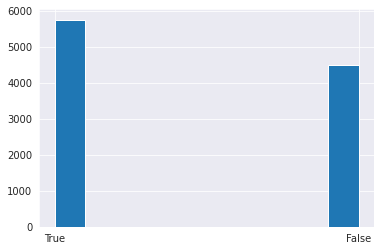

In [ ]:
train_set["label"].hist()

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
y_test

4193    False
4388     True
9822    False
9147     True
7199    False
        ...  
5255     True
9702     True
9425     True
3815     True
4648     True
Name: label, Length: 2048, dtype: object

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer( min_df=2, max_df=0.95, max_features = 200000, ngram_range = ( 1, 4 ),sublinear_tf = True )

vectorizer = vectorizer.fit(x_train)
tfidf_x_train = vectorizer.transform(x_train)
tfidf_x_test = vectorizer.transform(x_test)
tfidf_x_train.shape

(8191, 15039)

In [ ]:
tfidf_x_train

<8191x15039 sparse matrix of type '<class 'numpy.float64'>'
	with 114194 stored elements in Compressed Sparse Row format>

In [ ]:
x_train

8958                   financial regulatory bill kill job
7753    say appointed board created obamacare ability ...
2518    criminal alien released obama administration p...
3051                             dminus voting record nra
1813                                 support gay marriage
                              ...                        
769     say state district columbia voted democratic s...
893     every one supervisor election florida refused ...
2442    president offered fewer executive action almos...
6961    wisconsin percent small business qualify incom...
4481    austin effectively imposing ban barbecue resta...
Name: statement, Length: 8191, dtype: object

**NBC TRAIL **

In [ ]:
def calculate_prior(df,y):
  classes=sorted(list(df[y].unique()))
  prior=[]
  for i in classes:
    prior.append(len(df[df[y]==i])/len(df))
  return prior



In [ ]:
def g_probablity(df,feature,feature_value,Y,label):
  feat=list(df.columns)
  df=df[df[Y]==label]
  mean,std=df[feature].mean(),df[feature].std()
  p_x_given_y= (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
  return p_x_given_y

In [ ]:
def naive(df,X,Y):
  features=list(df.columns)[:-1]
  prior=calculate_prior(df,Y)
  y_prod=[]
  for a in X:
    labels=sorted((list(df[Y].unique())))
    likelihood=[1]*len(labels)
    for j in range(len(labels)):
      for i in range(len(features)):
        likelihood[j] *=g_probablity(df,features[i],a[i],Y,labels[j])

      post_prob=[1]*len(labels)
      for j in range(len(labels)):
        post_prob[j]=likelihood[j]*prior[j]
      y_prod.append(np.argmax(post_prob))
  return np.array(y_prod)



In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(train_set,test_size=0.20,random_state=41)
xtest=test.iloc[:,1]
ytest=test.iloc[:,0]

In [ ]:
xtest

3513    incontrovertible proof speed contributing fact...
9881    one three patient hospitalized harmed care rec...
448     country founded congress exactly attitude sanc...
6905    said washington post argued failure pas start ...
2313    criminal alien accounted percentof murder conv...
                              ...                        
9308    senate version health reform bill every enroll...
6981    obamas proposed budget double debt five year t...
6307    terroristsfriends family girlfriend united sta...
1605    wendy davis fighting bring bloombergstyle gun ...
1900    minimum number infrastructure need atlanta mil...
Name: statement, Length: 2048, dtype: object

In [ ]:
train.label

9531     True
286      True
1113     True
1721    False
7953     True
        ...  
8513     True
5200     True
4066    False
931      True
1984     True
Name: label, Length: 8191, dtype: object

In [ ]:
train=train.replace('\n','', regex=True)

train=train.replace(' ', '')
train

,label,statement
9531,True,say affordable care act already reduced number...
286,True,seven president barack obama republican democr...
1113,True,united state highest incarceration rate world
1721,False,president abrahamlincoln signed emancipation p...
7953,True,oil produced home buy rest world first time th...
...,...,...
8513,True,say security foreign enemy act would pause res...
5200,True,three city among top five worst city u asthma
4066,False,democrat senate last year introduced constitut...
931,True,say mitt romney gave speech week ago said stil...


In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(train_set,test_size=0.20,random_state=41)
xtest=test.iloc[:,1]
ytest=test.iloc[:,0]
y_pred=naive(train,X=xtest,Y="label")

from sklearn.metrics import confusion_matrix , fl_score
print(confusion_matrix(xtest,y_pred))
print(fl_score[xtest,y_pred])


TypeError: ignored

**NBC FINAL WORKING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
statement = train_set['statement'].values
label = train_set['label'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(label)
encoded_labels

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(statement, encoded_labels, stratify = encoded_labels,test_size=0.20)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
vec = CountVectorizer(max_features = 3000)
X = vec.fit_transform(train_sentences)
vocab = vec.get_feature_names()
X = X.toarray()
word_counts = {}
for l in range(2):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X.shape[0]):
    l = train_labels[i]
    for j in range(len(vocab)):
        word_counts[l][vocab[j]] += X[i][j]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import math
def laplace_smoothing(n_label_items, vocab, word_counts, word, text_label):
    a = word_counts[text_label][word] + 1
    b = n_label_items[text_label] + len(vocab)
    return math.log(a/b)

In [ ]:
def group_by_label(x, y, labels):
    data = {}
    for l in labels:
        data[l] = x[np.where(y == l)]
    return data

In [ ]:
def fit(x, y, labels):
    n_label_items = {}
    log_label_priors = {}
    n = len(x)
    grouped_data = group_by_label(x, y, labels)
    for l, data in grouped_data.items():
        n_label_items[l] = len(data)
        log_label_priors[l] = math.log(n_label_items[l] / n)
    return n_label_items, log_label_priors

In [ ]:
def predict(n_label_items, vocab, word_counts, log_label_priors, labels, x):
    result = []
    for text in x:
        label_scores = {l: log_label_priors[l] for l in labels}
        words = set(w_tokenizer.tokenize(text))
        for word in words:
            if word not in vocab: continue
            for l in labels:
                log_w_given_l = laplace_smoothing(n_label_items, vocab, word_counts, word, l)
                label_scores[l] += log_w_given_l
        result.append(max(label_scores, key=label_scores.get))
    return result

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
train_set['statement'] = train_set.statement.apply(lemmatize_text)

In [ ]:
def remove_tags(string):
    removelist = ""
    result = re.sub(r'[^w'+removelist+']', ' ',result)    #remove non-alphanumeric characters 
    result = result.lower()
    return result
train_set['statement']=train_set['statement'].apply(lambda cw : remove_tags(cw)) 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
train['statement'] = train['statement'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.metrics import accuracy_score
labels = [0,1]
n_label_items, log_label_priors = fit(train_sentences,train_labels,labels)
pred = predict(n_label_items, vocab, word_counts, log_label_priors, labels, test_sentences)
print(pred)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred))

[1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 